In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE


In [2]:
# Load dataset
df = pd.read_csv("readyForModeling.csv")
df.head()


,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,cuaca
0,24.3,33.2,27.1,90.0,1.9,2.8,4.0,300.0,1.0,4,2
1,24.3,29.8,26.5,91.0,24.3,2.7,3.0,130.0,0.0,8,2
2,24.0,34.0,27.9,86.0,3.4,0.4,3.0,70.0,1.0,8,2
3,24.2,34.2,28.4,82.0,0.0,4.2,3.0,300.0,1.0,8,1
4,24.2,32.2,27.4,88.0,0.0,7.7,4.0,280.0,1.0,8,1


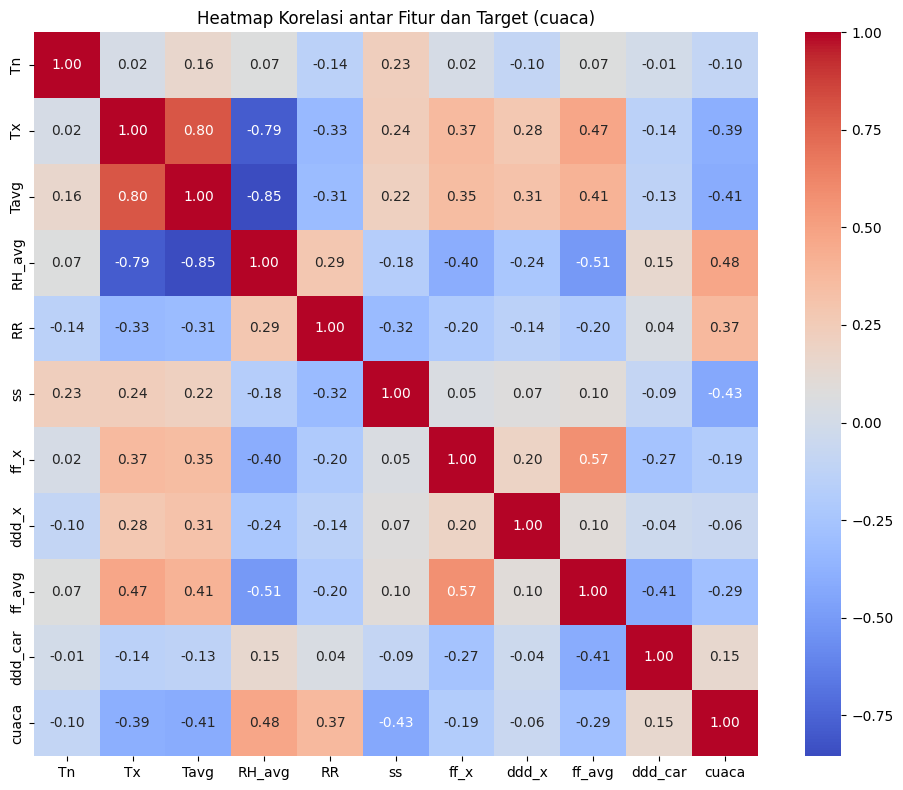

In [3]:
# Korelasi fitur dengan target
plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Heatmap Korelasi antar Fitur dan Target (cuaca)")
plt.tight_layout()
plt.show()


In [4]:
# Pisahkan fitur dan target
X = df.drop(columns=["cuaca"])
y = df["cuaca"]

In [5]:
# Tentukan fitur numerik dan kategorikal
numeric_features = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']
categorical_features = ['ddd_car']

In [6]:
# Pipeline preprocessing
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


In [7]:
# Pipeline lengkap dengan SMOTE dan Random Forest
pipeline = ImbPipeline([
    ('preprocessing', preprocessor),
    ('smote', SMOTE(k_neighbors=3, random_state=42)),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Evaluasi dengan cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1_macro')
print("F1 Macro CV Scores:", scores)
print("Mean F1 Macro:", scores.mean())


F1 Macro CV Scores: [0.92624113 0.92653061 0.66013072 0.66013072 0.88208617]
Mean F1 Macro: 0.8110238705411241
